In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasetoption/noshowappointments-kagglev2-may-2016.csv


# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Dataset Description** : This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

**PatientId** : indicates the patient ID, duplication is possible if the same patient booked more than one appointment.

**AppointmentID** : indicates appoint ID, this column should be unique

**Gender** : indicates the patient's gender (Male / Female) 

**ScheduledDay** : indicates the Date/Time the patient set up their appointment.

**AppointmentDay** : indicates the date/time the patient called to book their appointment.

**Age** : indicates the patient's age.

**Neighborhood** : indicates the location of the hospital.

**Scholarship** : indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

**Hipertension** : indicates whether or not the patient is experiencing Hypertension.

**Diabetes** : indicates whether or not the patient is experiencing Diabetes.

**Alcoholism** : indicates whether or not the patient is experiencing Alcoholism.

**Handcap** : indicates whether or not the patient is with special needs.

**SMS_received** : indicates whether or not the patient has received a reminder text message.

**Show-up**: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


## Question(s) for Analysis

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### 1. General Properties (Dataset dimensions, columns/ rows/ data types)

In [3]:
data_path = '../input/datasetoption/noshowappointments-kagglev2-may-2016.csv'

df = pd.read_csv(data_path,delimiter=";")

df.head(3) # head(n) : it take ( n ) integer as you want by default n = 5

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
df.shape    # to know the dimensions of the dataset

(110527, 14)

The dataset includes **14** columns and **110527** data rows.

In [5]:
df.info()  
# this function will return :
           #       the number of nonmissing values
           #       the data type of each column
           #       the memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


From the **info() function** we saw that **the DateTime Data** data type is **object (str)** so we need to convert it to **DateTime Type**

# Data Wrangling 

### is the process of converting data from the initial format to a format that may be better for analysis.

### including several steps : 

## ( Missing / Duplicated / Incorrect Data Validation )

### We Will Start With ( Missing Data )

In [6]:
#How many missing data points do we have in each column ?

missing_values_count = df.isnull().sum()
missing_values_count

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Awesome there is no ( Missing Data ) In Our DataSet

In [7]:
#total missing values

total_missing = missing_values_count.sum()
total_missing

0

## let's explore ( Duplicated Values Validation )

In [8]:
print('Number of Duplicated ( Appointment ID) is : ',sum(df.AppointmentID.duplicated()))

Number of Duplicated ( Appointment ID) is :  0


**Awesome** As we mentioned in Data Description : That the **Appointment ID** column Must be contain **Unique** Values

In [9]:
print('Number of Duplicated ( Patient ID) is : ',sum(df.PatientId.duplicated()))

Number of Duplicated ( Patient ID) is :  48228


As we mentioned in Data Description : That **duplication** is **possible** due to cases where the same patient may booked more than one appointment.

In [10]:
df.PatientId.value_counts().head()
# this function to know How Many each patient booked an appointment

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
Name: PatientId, dtype: int64

the output of the **value_counts()** function, I note **the top 5** patients that booked the biggest number of appointments.

## Incorrect Data Validation ( Depending on the nature of each column )

In [11]:
# Check for zero OR negative AppointmentID

df[df.AppointmentID <= 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [12]:
# Check for zero OR negative PatientsId values

df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: int64)

In [13]:
# Check the values in the Gender column

df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [14]:
df['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [15]:
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

the **AppointmentDay** column values above, the **time** portion is set to **zero**, therefore, the time aspect of the appointment is not going to be included in this analysis.

In [16]:
# check the values in the Age column
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

the **Age** values, we notice that there is **one record** with negative value **(-1)**; per review of the dataset documentation on [Kaggle](www.Kaggle.com), there is no confirmation why **(-1)** was assigned in the 'Age' column; some suggested that the negative value could be assigned where **the patient** has **not been born yet**; others suggested that this might be **a mistake**; for the time, we are going to **exclude** this record from our analysis.

In [17]:
# Check if the Age column has Zero OR negative values

df[df.Age <= 0]['Age'].unique()

array([ 0, -1])

As we see there are valuse of **(ZERO)** Ages

we will **accept** patients with **ZERO** age assuming they represent **newborns** less than one year old

In [18]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [19]:
df['Neighbourhood'].nunique()
# (n)unique : to display the integer number of uniue

81

In [20]:
df['Scholarship'].unique()

array([0, 1])

As we see the **Scholarship** column has **True OR False** Data df['Hipertension'].unique()

In [21]:
df['Hipertension'].unique()

array([1, 0])

As we see the **Hipertension** column has **True OR False** Data 

In [22]:
df['Diabetes'].unique()

array([0, 1])

As we see the *Diabetes** column has **True OR False** Data 

In [23]:
df['Alcoholism'].unique()

array([0, 1])

As we see the **Alcoholism** column has **True OR False** Data 

In [24]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

As we see the **Handcap** column has **Ranked** Data in **5** Levels 

In [25]:
df['SMS_received'].unique()

array([0, 1])

As we see the **SMS_received** column has **True OR False** Data 

In [26]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

As we see the **No-show** column has **True OR False** Data 

##  Summary
we explored each column individually to detict any data errors, so we will fix them in the next step,
we also identified the data types and determined how we are going to use each column in our analysis.

the data frame includes **many** types of data:

 **Categorical Data**  : Gender , Neighbourhood
 
 **Quantitative Data** : PatientId , AppointmentID , Age
 
 **Treu OR False Data**: Scholarship , Hipertension , Diabetes , Alcoholism  , SMS_received , No-show
 
 **DateTime Data**     : ScheduledDay , AppointmentDay 
 
 **Ranked Data**       : Handcap
 
As we learned on the Challenger Track That the data may be (**Quantative OR Categorical**).

please see the summary below:

**PatientId** : (Quantitative - Discrete): as mentioned above, a number of patients have more than one appointment, this column will be used in the analysis.

**AppointmentID** : (Quantitative - Discrete) (**unique values**): we will use it as the primary factor in our dataset

**Gender** : (Categorical - Nominal)

**ScheduledDay** :(Quantitative - Continuous): we will use the date section only to calculate the waiting duration between the appointment booking date and the appointment date.

**AppointmentDay** : (Quantitative - Continuous): we will use the date section only to calculate the waiting duration between the appointment booking date and the appointment date and to create a new column **(DayOfWeek)**.

**Age** :(Quantitative - Continuous): we will use this column to create age groups.

**Neighborhood** :(Categorical - Nominal) 

**Scholarship** : (Categorical - Nominal): we will use this column to categorize our results as (True OR False).

**Hipertension** : (Categorical - Nominal): we will use this column to categorize our results as (True OR False).

**Diabetes** : (Categorical - Nominal): we will use this column to categorize our results as (True OR False).

**Alcoholism** :(Categorical - Nominal): we will use this column to categorize our results as (True OR False).

**Handcap** : (Categorical - **Ordinal**): we will use this column to categorize our results as (Level Rank).

**SMS_received** : (Categorical - Nominal): we will use this column to categorize our results (True OR False).

**Show-up**: (Categorical - Nominal): we will use this column to categorize our results as (True OR False).

# Now Let's Do Some Cleaning & Preparation to our Data

### Data Preparation

From The Data-Set Option 

The Main Purpose of this Project is to Know : 

What **factors** are important for us to know in order to **predict** if a patient will **show up** for their scheduled appointment? 

So The **(Show-up)** Column is The Main Column 

Let's **Rename** This Column To a Descriptive Name

In [27]:
# We will Rename The (Show-up) Column TO (Status)

# Rename Columns

df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Status']

df.head(1) #now i renamed the (Show-up) Column into Status 

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [28]:
df.dtypes

PatientID          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
SMS_received       int64
Status            object
dtype: object

In [29]:
# Convert PatientID to integer 

df['PatientID'] = (df['PatientID']).astype('int64')

In [30]:
# Convert AppointmentDay and ScheduledDay from String to DateTime format

# Appointment Date
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDay']).dt.date

df['DayofWeek'] = pd.to_datetime(df['AppointmentDay']).dt.weekday
df.drop('AppointmentDay',axis=1, inplace = True)

# Appointment Booking Date
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date

df.drop('ScheduledDay',axis=1, inplace = True)


# Note: Since the Appointment times were set to 00:00:00 in all the appointments, 
# our analysis will not include the appointment time.


In [31]:
# Create a new column to show the Waiting Duration (in days) between the scheduling date and appointment date 

df['WaitingDuration'] = df.AppointmentDate - df.ScheduledDate

In [32]:
# let,s know the what is the data in this column

df['WaitingDuration'].head()

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
Name: WaitingDuration, dtype: timedelta64[ns]

In [33]:
# Let's Check If There are any appointment was booked (recorded) after the actual appointment

df[df['WaitingDuration'] < '0 days']

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration
27033,7839272661752,5679978,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,0,2016-05-10,-1 days
55226,7896293967868,5715660,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,1,2016-05-18,-1 days
64175,24252258389979,5664962,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,2,2016-05-05,-1 days
71533,998231581612122,5686628,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,3,2016-05-11,-6 days
72362,3787481966821,5655637,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,1,2016-05-04,-1 days


As we see From **(Waiting Duration )** Column That there are **(5)** appointments where the appointment was booked (recorded) **after** the actual appointment , so they have **Negative** Values in dayes.

**Also**, we checked the **NoShow** (Status) column and noticed that **none** of the patients who booked these appointment did show up **(NoShow = Yes)**.

As the dataset documentation doesn't provide any explanation for these particuler appointments ,

therefore, we will temporarily **exclude** them from our analysis.

In [34]:
# Exclude the 5 records with the negative waiting duration, the new dataset size is 110527 - 5 = 110522

df = df[df['AppointmentDate'] >= df['ScheduledDate']]
df.shape

(110522, 16)

In [35]:
# Exclude the record with the negative Age value

df = df[df.Age != -1]
df.shape

(110521, 16)

As we Know 

In The **NO-SHOW** (Status ) Column That :

 ( NoShow = Yes )  &   ( Show = No ).

In [36]:
df['Status'] = df.Status.astype('category')

We Know That The Data Types can include **Int OR Str OR Float OR Bool 

**Also** It can be **Categorical** Data type [This Documentation Helps Me](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) .

In [37]:
df.Status.cat.rename_categories(['Show','NoShow'], inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


This Function Will Assign **New** categories which will replace **old** categories.

Use this Link of [cat.rename_categories Function](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.rename_categories.html) to read more about it 

In [38]:
df['Gender'] = df.Gender.astype('category')

df.Gender.cat.rename_categories(['Female','Male'], inplace = True)

In [39]:
df['Scholarship'] = df.Scholarship.astype('category')
df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)

In [40]:
df['Hypertension'] = df.Hypertension.astype('category')
df.Hypertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)


In [41]:
df['Diabetes'] = df.Diabetes.astype('category')
df.Diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True)

In [42]:
df['Alcoholism'] = df.Alcoholism.astype('category')
df.Alcoholism.cat.rename_categories(['No Alcoholism','Alcoholism'], inplace = True)

In [43]:
df['Handicap'] = df.Handicap.astype('category')
df.Handicap.cat.rename_categories(['No Handicap','Handicap L1','Handicap L2', 'Handicap L3', 'Handicap L4'], inplace = True)

we know that the **HandiCap** Column has **Ranked** Values ( 0, 1, 2, 3, 4, )

In [44]:
df['SMS_received'] = df.SMS_received.astype('category')
df.SMS_received.cat.rename_categories(['No SMS_received','SMS_received'], inplace = True)

The above cell we use cat.**reorder**_categories instead cat.**rename**_categories to reorder the day of week 

read the [cat.reorder_categories function documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.reorder_categories.html)

In [45]:
# Convert WaitingDuration column to integer for easier filteration 

df['WaitingDuration'] = (df.AppointmentDate - df.ScheduledDate).astype('timedelta64[D]').astype(int)

let's Group The **waiting Duration** Column using [The Cut Function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)

Let's 1st display the min & max **Waiting Days** in this column to know how to cut them

In [46]:
print(df['WaitingDuration'].min())
print(df['WaitingDuration'].max())

0
179


In [47]:
# Define a new column to include the Waiting Duration Groups

WtngDurtnGroupLabels = [ "{0} - {1}".format(i, i + 29) for i in range(0, 180, 30)]
df['WaitingDurationGroups'] = pd.cut(df.WaitingDuration, range(0, 181, 30), right=False, labels=WtngDurtnGroupLabels)

df['WaitingDurationGroups'] = df.WaitingDurationGroups.astype('category')
df.WaitingDurationGroups.cat.categories

Index(['0 - 29', '30 - 59', '60 - 89', '90 - 119', '120 - 149', '150 - 179'], dtype='object')

The cell above shows **(6)** waiting duration groups (in days) from **(0 - 179)** with an internal of 30 days.

Let's display the min & max **Ages** in this column to know how to cut them

In [48]:
print('Minimum Age is : ',df['Age'].min())
print('Minimum Age is : ',df['Age'].max())

Minimum Age is :  0
Minimum Age is :  115


In [49]:
# Define a new column to include the Age Groups

AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['AgeGroup'] = pd.cut(df.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)

df['AgeGroup'] = df.AgeGroup.astype('category')
df.AgeGroup.cat.categories

Index(['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'], dtype='object')

The cell above shows **(6)** Age groups (in years) ranging from **(0 - 119)** with an internal of 20 years

As we seen before, the number of **Neighbourhoods (81)** is large, 

so, we will limit our analysis to the **top 10** Neighbourhoods with the highest numbers of appointments.

In [50]:
# Let's Create a new dataframe to limit patients to those who are based in the top 10 neibhourhoods 
# with the highest numbers of appointments.

# Step one: Create a list of the top 10 neibhourhoods with the highest numbers of appointments.

top_10_Neighbourhood_list = list(df['Neighbourhood'].value_counts().nlargest(10).index) # will return index


# Step two: Create a new dataframe based on the list above

df_top_10_Neighbourhood = df[df['Neighbourhood'].isin (top_10_Neighbourhood_list)] # isin (index)


# Step three: apply filteration on the Status column to include the NoShow records only

df_top_10_Neighbourhood_NoShow = df_top_10_Neighbourhood[df_top_10_Neighbourhood['Status']=='NoShow']

In [51]:
# Limit our dataset to appointments with NoShowUp status  

NoShow_df = df[df['Status'] == 'NoShow']

# Here I can Say That I cleaned My Data To analysis

In [52]:
# Let's Display It

df.head()

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration,WaitingDurationGroups,AgeGroup
0,29872499824296,5642903,Female,62,JARDIM DA PENHA,No Scholarship,Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,0 - 29,60 - 79
1,558997776694438,5642503,Male,56,JARDIM DA PENHA,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,0 - 29,40 - 59
2,4262962299951,5642549,Female,62,MATA DA PRAIA,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,0 - 29,60 - 79
3,867951213174,5642828,Female,8,PONTAL DE CAMBURI,No Scholarship,No Hypertension,No Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,0 - 29,0 - 19
4,8841186448183,5642494,Female,56,JARDIM DA PENHA,No Scholarship,Hypertension,Diabetes,No Alcoholism,No Handicap,No SMS_received,Show,2016-04-29,4,2016-04-29,0,0 - 29,40 - 59


<a id='eda'></a>
## Exploratory Data Analysis



**Questions**

      1- What is the overall appointment show-up vs. no show-up rate?
   
      2- What are the proportions of the different categories within each variable ?
      
      3- What is the show-up rates in different categories within each variable?

**Note:** : The Main question is :

What **factors** are important for us to know in order to predict if a patient will show up for their scheduled appointment? 

Before answering the Questions above, we will define some functions to help us in our analysis.

In [53]:
# Create a funtion to plot the group proportions based on one variable by number of appointments

def Proportion_By_Variable(df, variable):
    Categories_Data_Frame = df[variable].value_counts() 
    Pie_Chart = Categories_Data_Frame.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    Pie_Chart.set_title(variable + ' Percentage (Per appointment)\n', fontsize = 15)
    Categories_percentage = np.round(Categories_Data_Frame/df.shape[0]*100,2)
    return Categories_percentage

Let's define the **(Proportion_By_Variable)** Function how it will work step by step

1- it takes **two** arguments : **df :** The Data Frame & **Variable :** The [column] we want to plot it's categories
                              
2- **Categories_Data_Frame :** will count each category in this column

3- **Pie_Chart :** The Visulization it self : 

                          figsize : as you want to display 
                          autopct : this number (1.2) means i want to round the valuse of  
                                    Categories_Data_Frame into only **two** decimal point 
                          fontsize : as you want                                        
4- Set Chart Title

5- **Categories_percentage :** 
                            
                            1st we know that (Categories_Data_Frame) will return the sum count of each category
                            and the (df.shap) will return a tuple of (row,column) 
                            we need only the rows so we use the (index[0])
                            it will return the sum of each category devided by the number of rows 
                            finally i rounded the result to only **two** decimal points

In [54]:
# Create a funtion to plot the group proportions based on one variable by patient

def Number_Of_Patients(df, variable):
    PatientID_Count = df.groupby(variable)['PatientID'].nunique().to_frame()
    Pie_Chart = PatientID_Count.plot.pie(figsize=(10,10), autopct='%1.2f%%', subplots=True, fontsize = 12, legend = False)
    plt.title(variable + ' Percentage (Per patient)\n', fontsize = 15)
    Categories_percentage = np.round(PatientID_Count/sum(PatientID_Count['PatientID'])*100,2)
    return Categories_percentage

Let's define the **(Number_Of_Patients)** Function how it will work step by step

1- it takes **two** arguments : **df :** The Data Frame & **Variable :** The [column] we want to plot it's categories
                              
2- **PatientID_Count :** as we now from the description that **the PatientID Column** has a duplicated PatientID 

                       we only need the uniqye ( patients ) so i used ( nunique ) function 
                       instead of ( unique ) the ( nuniue ) will return the number of uniques
                       at this point the ( nunique ) will return a ( pandas series )
                       but we need ( pandas Data Frame )
                       so i used the ( to_frame ) function 

3- the rest of code as the previous function 

In [55]:
def Status_bar_plot(df, Variable):
    df_by_Group = pd.crosstab(df[Variable], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5))
    Values_of_Y_Coordinator = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in Values_of_Y_Coordinator])
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rectangles = ax.patches

    # Add Data Labels

    for rect in rectangles:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='center',
                fontsize = 12)
    return df_by_Group

Let's define the **(Status_bar_plot)** Function how it will work step by step

1- it takes **two** arguments : **df :** The Data Frame & **Variable :** The [column] we want to plot it's categories

2- df_by_Group = pd.crosstab(df[Variable], df.Status, normalize = 'index')
   2nd arg : here i need all analysis according to status variable so set it to column arg
   1st arg : the variable as we want to check
   
read this [documentation](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) about this fuc helped me


ax = df_by_Group.plot.bar     will plot a bar 

Values_of_Y_Coordinator = ax.get_yticks()  to modify the y axiss points

ax.set_yticklabels(['{:3.0f}%'.format(x) for x in Values_of_Y_Coordinator])
for each point in y axis will be in format of 0 decimals

ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
       loc : is the location of legend 
       bbox_to_anchor this [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) helped me so read it

rectangles = ax.patches   (to get every rectangle in the plot) to add data labels

for loop acrros every rectangle (patch) in the plot and add data lables read this [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html) helped me

**Research Question 1:** what is the overall appointment show-up vs. no show-up rate?

Show      79.81
NoShow    20.19
Name: Status, dtype: float64

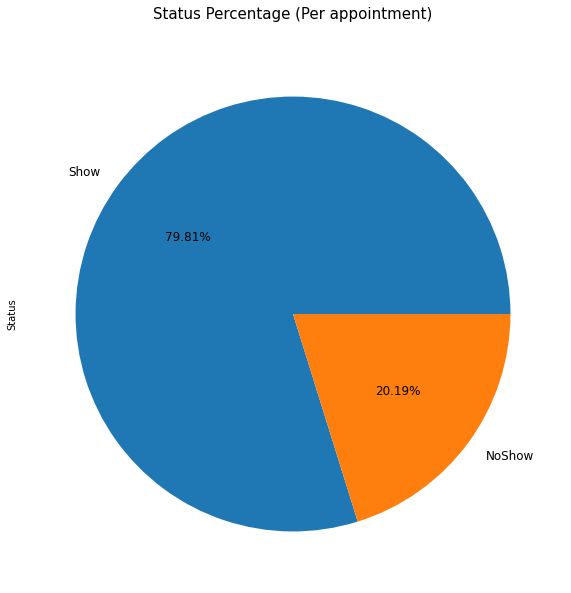

In [56]:
Proportion_By_Variable(df, 'Status')

Looking at the pie chart above, the overall show-up rate is **79.81%**.

**NOTE:** the pie chart above is calculated based on the number of appointments (not number of patients), in the next questions, we will include the number of patients in our calculations.


### Research Question 2 & 3: 
What are the proportions of the different categories within each variable ?

What is the show-up rates in different categories within each variable ?

To answer these two questions, we will perform the following:

    1- Calculate the category proportions within each variable (per appointment and per patient) and present the 
       proportions (%) in a pie chart .
    2- Calculate the Show-up vs. No Show-up (%) for each category within each variable, plot the results in a bar chart
       and calculate the variance between the highest & lowest show-up rate.

**GENDER**

Female    65.0
Male      35.0
Name: Gender, dtype: float64

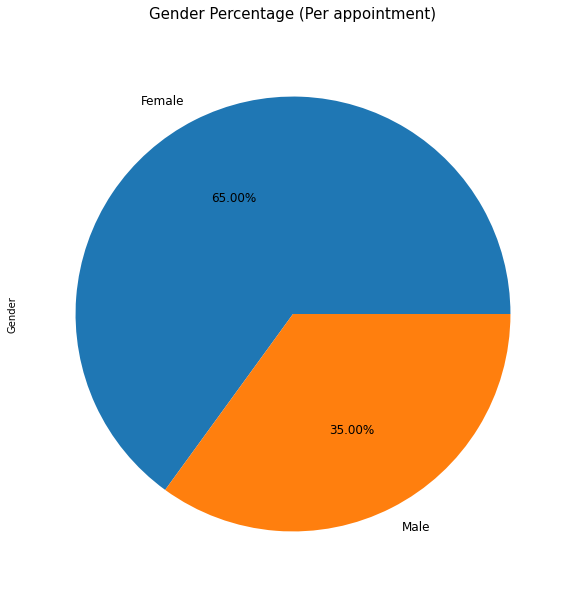

In [57]:
Proportion_By_Variable(df, 'Gender')

Looking at the chart above, we find that the appointment proportion where patients are **females is 65%**, where the proportion of appointments where patients are **males is 35%**.

,PatientID
Gender,
Female,64.28
Male,35.72


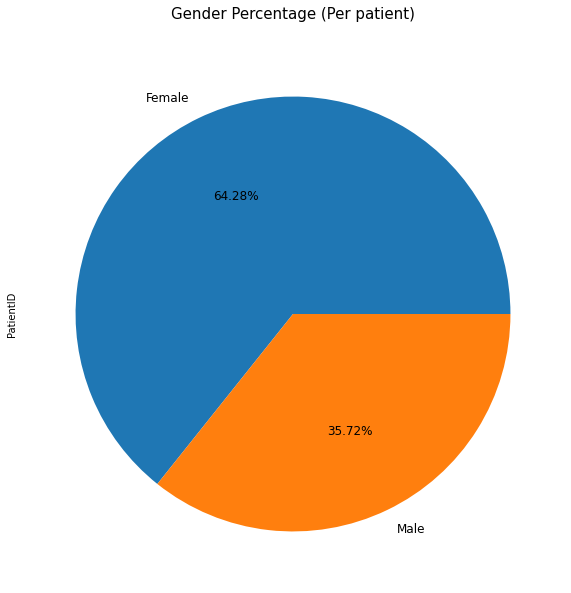

In [58]:
Number_Of_Patients(df, 'Gender')

Looking at the chart above  which is the proportion of males and females (by appointment), we find that **64.28%** of the patients are **females** and **35.72% are males**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
Gender,,
Female,79.69,20.31
Male,80.04,19.96


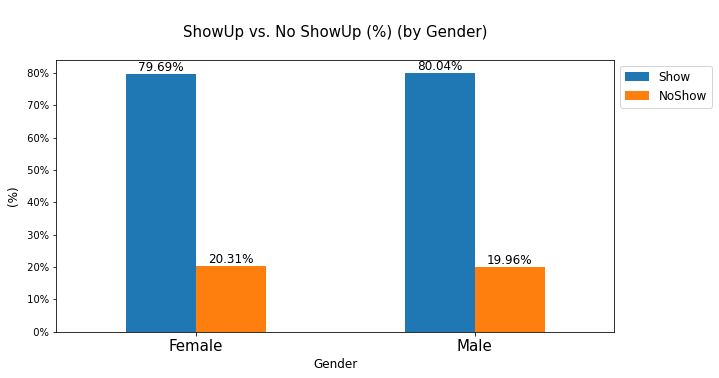

In [59]:
Status_bar_plot(df, 'Gender')

Based on the **Gender** analysis above, we found that:

    1- The proportion of appointments where patients are females is greater than the number of appointments where
       patients are males
    2- The proportion of female patients is greater than the number of male patients.
    3- The Show-up rate of male patients (per no. of appointments) is slightly greater than the show-up rate of female 
       patients.


**Age Groups**

0 - 19       27.51
40 - 59      27.21
20 - 39      26.12
60 - 79      16.11
80 - 99       3.03
100 - 119     0.01
Name: AgeGroup, dtype: float64

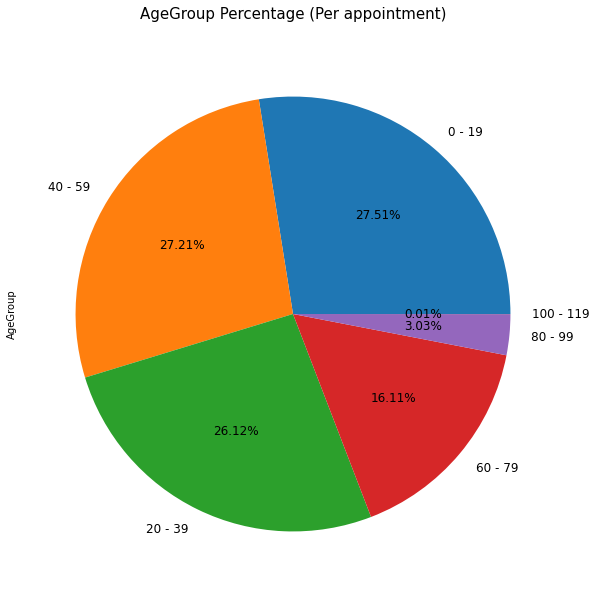

In [60]:
Proportion_By_Variable(df, 'AgeGroup')

Looking at the chart above, we find that the appointment proportion where patients are from the age group **(0-19) is the largest with 27.51%**, where the proportion of appointments where patients are from the age group **(100 - 119) is the smallest with **0.01%**

,PatientID
AgeGroup,
0 - 19,28.89
20 - 39,25.30
40 - 59,26.25
60 - 79,16.40
80 - 99,3.16
100 - 119,0.01


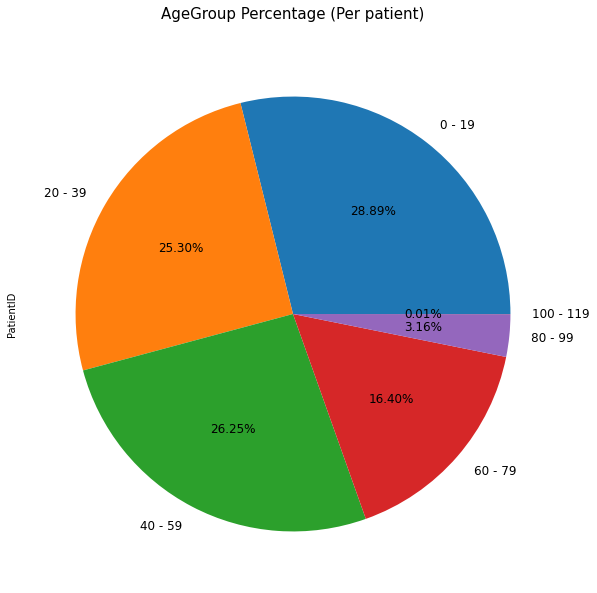

In [61]:
Number_Of_Patients(df, 'AgeGroup')

Looking at the chart above, we find that **28.89%** of the patients are from the age group **(0 - 19)** where only **0.01%** of the patients are from the age group **(100 - 119)**. These proportions are very close the proportions we got when calculating the proportions (by appointments).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
AgeGroup,,
0 - 19,77.84,22.16
20 - 39,76.87,23.13
40 - 59,81.19,18.81
60 - 79,84.88,15.12
80 - 99,83.71,16.29
100 - 119,72.73,27.27


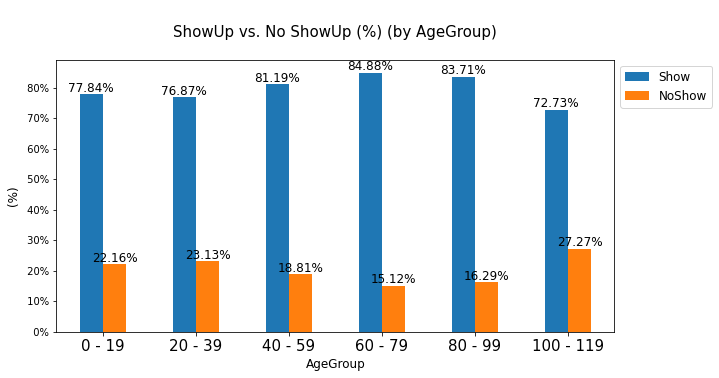

In [62]:
Status_bar_plot(df, 'AgeGroup')

Based on the **Age** analysis above, we found that:

    1- The proportion of appointments where patients are from the age group (0 -19) is largest where the age group
       (100 - 119) is the smallest with 0.01% 
    2- Same to the number of patients. .
    3- The Show-up rate of age group (60 - 79) (per no. of appointments) is the highest with 84.88%
       where the show-up rate of age group (100 - 119) is the lowest with 72.73%

**Q2.3:** Neighbourhood

As mentioned before, we've limited the number of neighbourhood in our analysis to 10 (instead of 81) to include the top 10 neigbourhoods with the greatest number of appointments.

JARDIM CAMBURI       19.02
MARIA ORTIZ          14.31
RESISTÊNCIA          10.92
JARDIM DA PENHA       9.56
ITARARÉ               8.66
CENTRO                8.22
TABUAZEIRO            7.72
SANTA MARTHA          7.72
JESUS DE NAZARETH     7.03
BONFIM                6.84
Name: Neighbourhood, dtype: float64

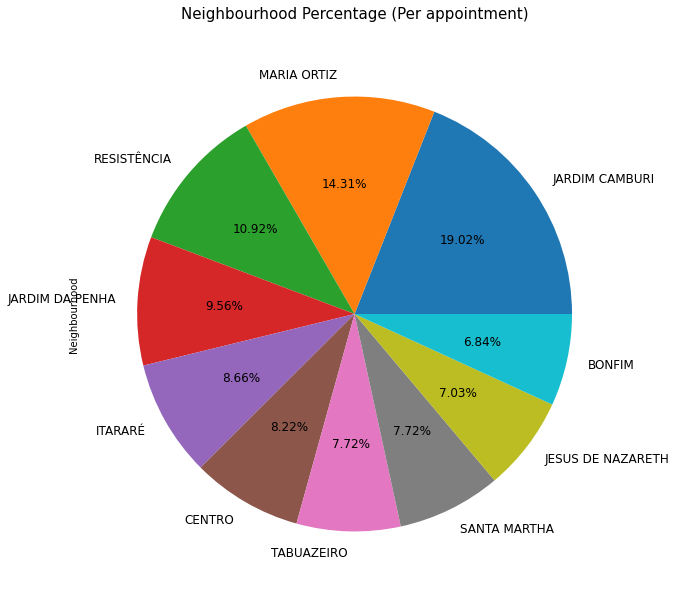

In [63]:
Proportion_By_Variable(df_top_10_Neighbourhood, 'Neighbourhood')

Looking at the chart above, we find that the appointment proportion where patients are based in JARDIM CAMBURI is the largest with **19.02%**, where the proportion of appointments where patients are based in BONFIM is the smallest with **6.84%**

,PatientID
Neighbourhood,
BONFIM,7.03
CENTRO,8.13
ITARARÉ,9.30
JARDIM CAMBURI,18.25
JARDIM DA PENHA,10.48
JESUS DE NAZARETH,6.25
MARIA ORTIZ,14.53
RESISTÊNCIA,10.33
SANTA MARTHA,7.61


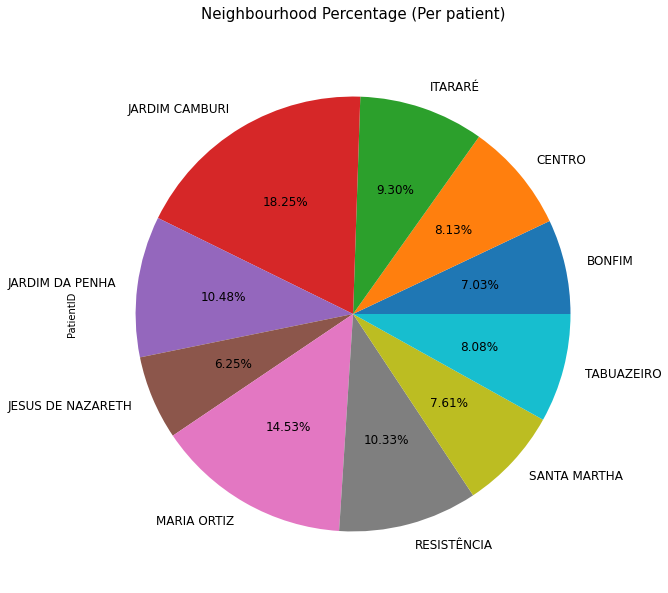

In [64]:
Number_Of_Patients(df_top_10_Neighbourhood, 'Neighbourhood')

Looking at the chart above, we find that **18.25%** of the patients are based in **JARDIM CAMBURI**, which is close to the proportion we got when calculating the proportions (by appointments).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
Neighbourhood,,
BONFIM,80.17,19.83
CENTRO,78.91,21.09
ITARARÉ,73.73,26.27
JARDIM CAMBURI,81.02,18.98
JARDIM DA PENHA,83.72,16.28
JESUS DE NAZARETH,75.60,24.40
MARIA ORTIZ,79.00,21.00
RESISTÊNCIA,79.57,20.43
SANTA MARTHA,84.16,15.84


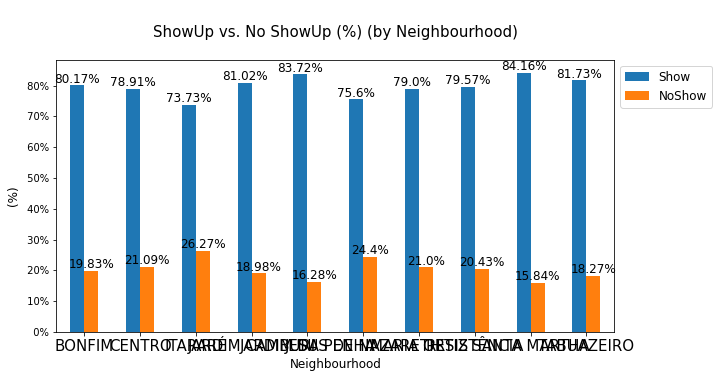

In [65]:
Status_bar_plot(df_top_10_Neighbourhood, 'Neighbourhood')

As we see above the chart need some modification so i will use the same **bar plot function** but with some modifications

In [66]:
def Status_bar_plot_modification(df, Variable):
    df_by_Group = pd.crosstab(df[Variable], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(stacked = True,figsize=(10,5)) # stacked = True 
    Values_of_Y_Coordinator = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in Values_of_Y_Coordinator])
    ax.set_xticklabels(df_by_Group.index,rotation = 45, fontsize = 15) #change rotation to be = 45
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rectangles = ax.patches

    # Add Data Labels

    for rect in rectangles:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='center',
                fontsize = 12)
    return df_by_Group

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
Neighbourhood,,
BONFIM,80.17,19.83
CENTRO,78.91,21.09
ITARARÉ,73.73,26.27
JARDIM CAMBURI,81.02,18.98
JARDIM DA PENHA,83.72,16.28
JESUS DE NAZARETH,75.60,24.40
MARIA ORTIZ,79.00,21.00
RESISTÊNCIA,79.57,20.43
SANTA MARTHA,84.16,15.84


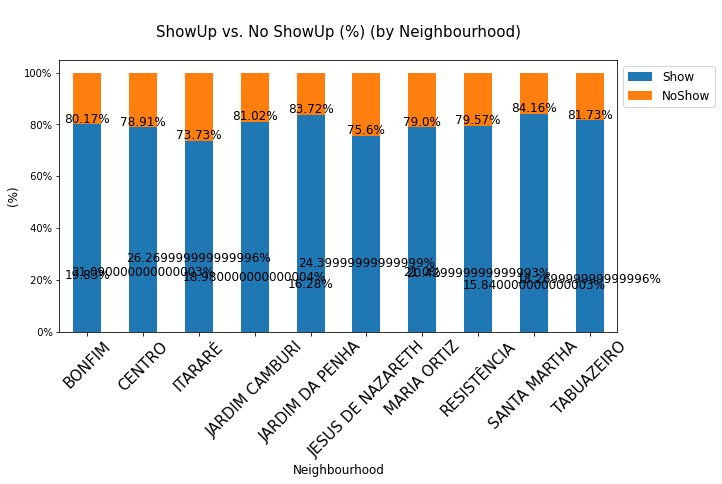

In [67]:
Status_bar_plot_modification(df_top_10_Neighbourhood, 'Neighbourhood')

Based on the **Neighbourhood** analysis above, we found that:

    1- The proportion of appointments where patients are based JARDIM CAMBURI is the largest with 19.02%
       where BONFIM is the smallest with 6.84%
    2- Same to the number of patients. .
    3-The Show-up rate of SANTA MARTHA (per no. of appointments) is the highest with 84.16%
      where the show-up rate of ITARARÉ is the lowest with 73.73%

**Q2.4:** Scholarship

No Scholarship    90.17
Scholarship        9.83
Name: Scholarship, dtype: float64

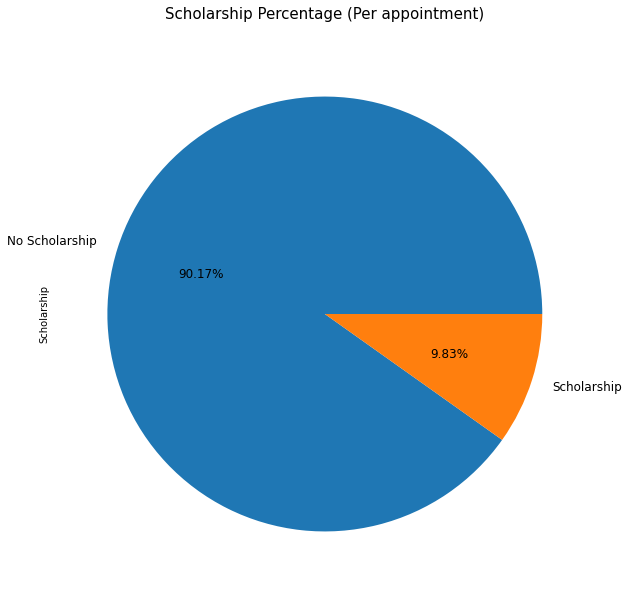

In [68]:
Proportion_By_Variable(df, 'Scholarship')

Looking at the chart above, we find that the appointment proportion where patients **don't have a scholarship is 90.17%**, where the proportion of appointments where patients have been **has a scholarship is 9.83%**.

,PatientID
Scholarship,
No Scholarship,90.71
Scholarship,9.29


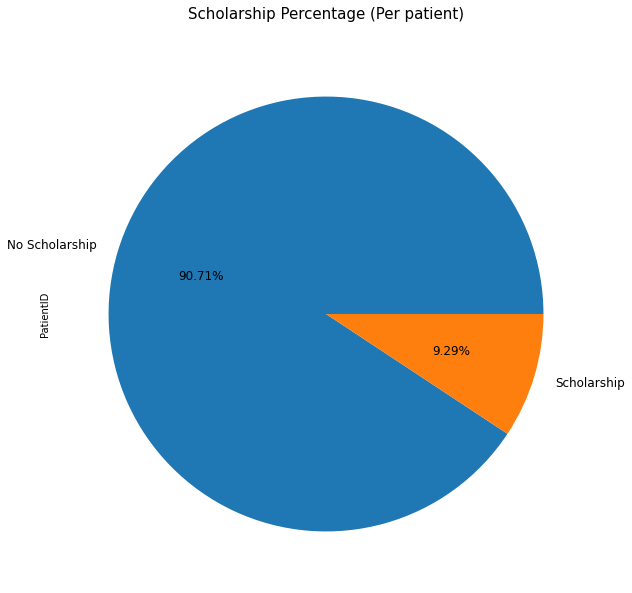

In [69]:
Number_Of_Patients(df, 'Scholarship')

Looking at the chart above, we find that **90.71% of the patients don't have a scholarship**, where only **9.29% of the patients have been has a scholarship**.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
Scholarship,,
No Scholarship,80.20,19.80
Scholarship,76.26,23.74


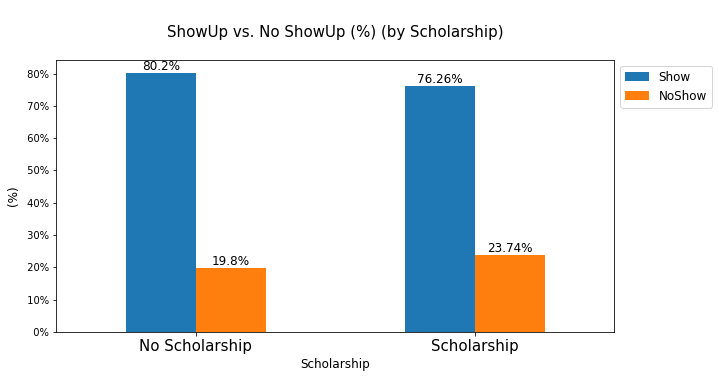

In [70]:
Status_bar_plot(df, 'Scholarship')

Based on the **Scholarship** analysis above, we found that:

    1- The proportion of appointments where patients don't have a scholarship is the largest with 90.17%
    2- The proportion of patients who don't have a scholarship is the largest with 90.71%.
    3- The Show-up rate of patients who don't have a scholarship is the highest with 80.2%
       where the show-up rate of patients who have a scholarship is 76.26%

**Q2.5:** Hypertension

No Hypertension    80.27
Hypertension       19.73
Name: Hypertension, dtype: float64

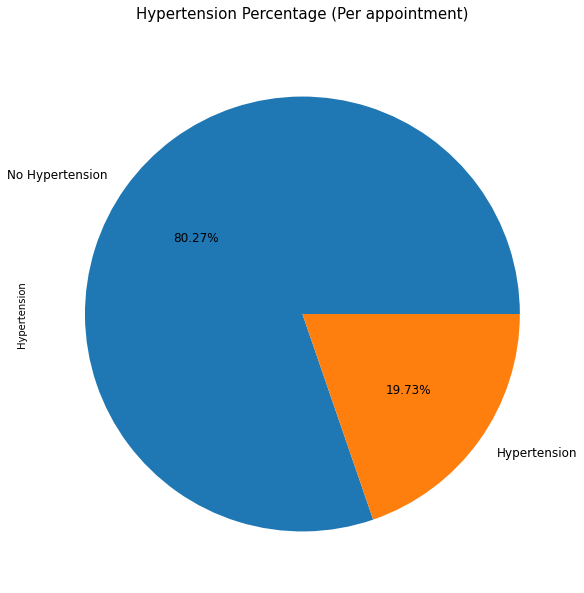

In [71]:
Proportion_By_Variable(df, 'Hypertension')

Looking at the chart above, we find that the appointment proportion where patients have **no hypertension is 80.27%**, where the proportion of appointments where patients **have hypertension is 19.73%**.

,PatientID
Hypertension,
No Hypertension,80.35
Hypertension,19.65


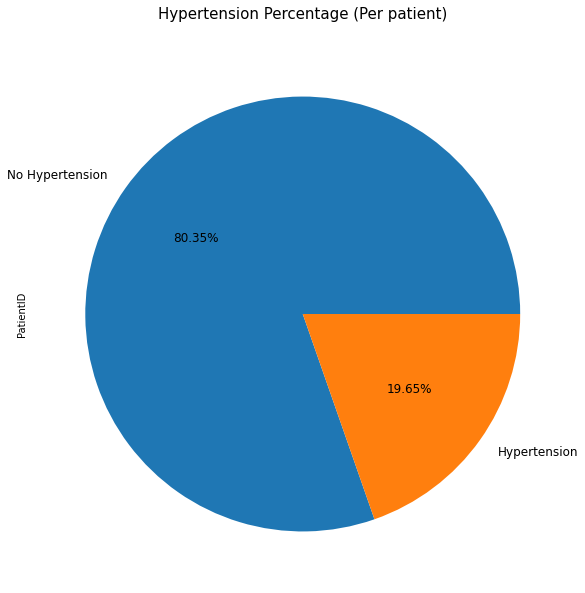

In [72]:
Number_Of_Patients(df, 'Hypertension')

Looking at the chart above, we find that **80.35% of the patients don't have hypertension**, which is close to the proportion we got when calculating the proportions (by appointments).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
Hypertension,,
No Hypertension,79.1,20.9
Hypertension,82.7,17.3


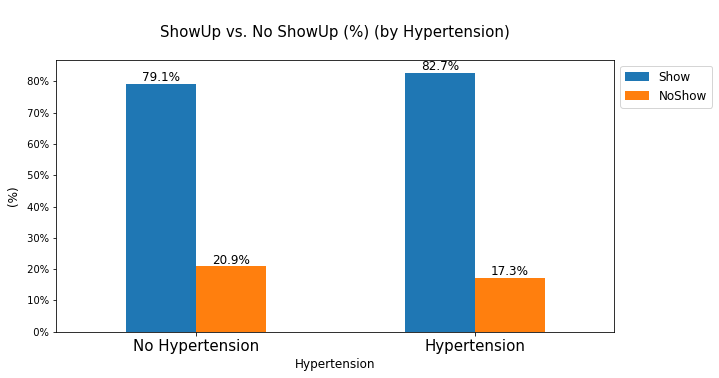

In [73]:
Status_bar_plot(df, 'Hypertension')

Based on the **Hypertension** analysis above, we found that:

    1- The proportion of appointments where patients don't have hypertension is the largest with 80.27%
    2- The proportion of patients who don't have hypertension is the largest with 80.35%.
    3- The Show-up rate of patients who have hypertension is the highest with 82.7%
       where the show-up rate of patients who dont'have hypertension is 79.1%

**Diabetes**

No Diabetes    92.81
Diabetes        7.19
Name: Diabetes, dtype: float64

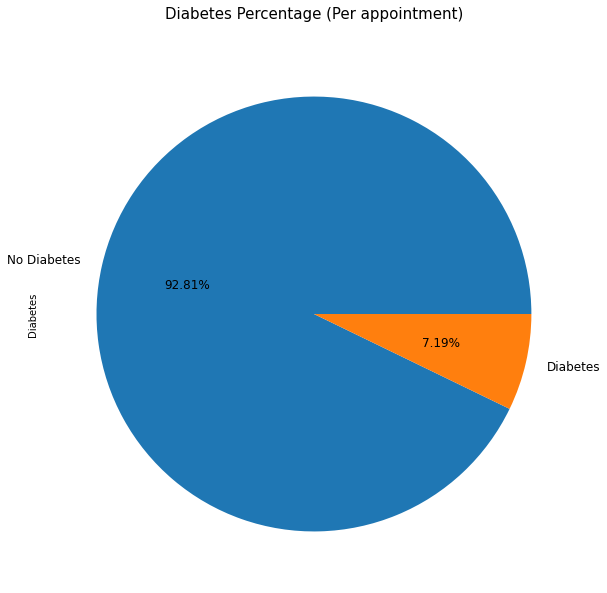

In [74]:
Proportion_By_Variable(df, 'Diabetes')

Looking at the chart above, we find that the appointment proportion where patients **don't have diabetes is 92.81%**, where the proportion of appointments where patients **have diabetes is 7.19%**.

,PatientID
Diabetes,
No Diabetes,92.91
Diabetes,7.09


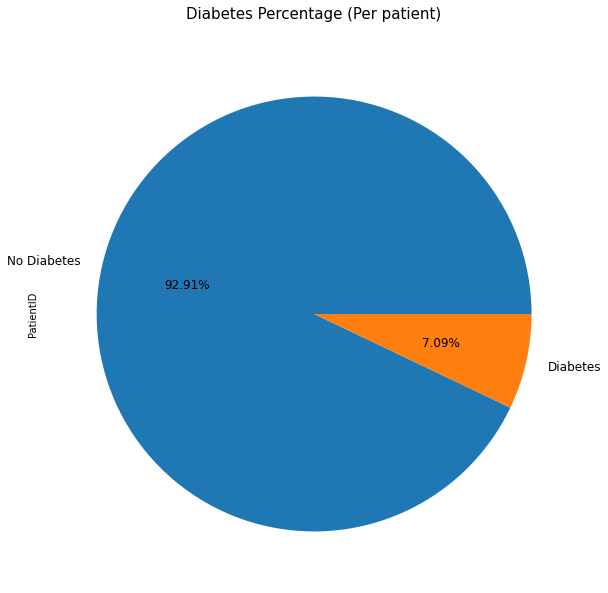

In [75]:
Number_Of_Patients(df, 'Diabetes')

Looking at the chart above, we find that **92.91% of the patients don't have diabetes**, which is very close to the proportion we got when calculating the proportions (by appointments).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
Diabetes,,
No Diabetes,79.64,20.36
Diabetes,82.00,18.00


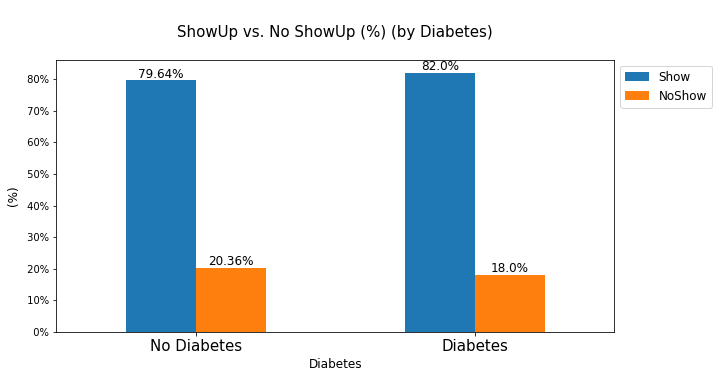

In [76]:
Status_bar_plot(df, 'Diabetes')

Based on the **Diabetes** analysis above, we found that:

    1- The proportion of appointments where patients don't have diabetes is the largest with 92.81%
    2- The proportion of patients who don't have diabetes is the largest with 92.91%.
    3- The Show-up rate of patients who have diabetes is the highest with 82%
       where the show-up rate of patients who don't have diabetes is 79.64%

**Alcoholism**

No Alcoholism    96.96
Alcoholism        3.04
Name: Alcoholism, dtype: float64

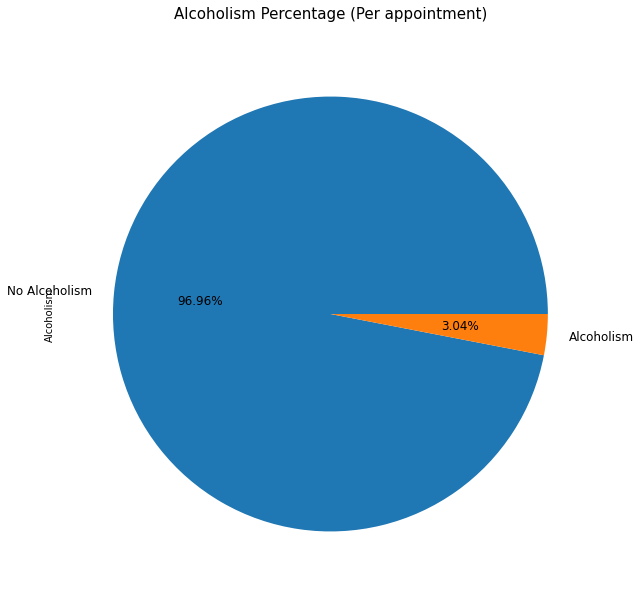

In [77]:
Proportion_By_Variable(df, 'Alcoholism')

Looking at the chart above, we find that the appointment proportion where patients **have no alcoholism is 96.96%**, where the proportion of appointments where patients **have alcoholism is 3.04%**.

,PatientID
Alcoholism,
No Alcoholism,97.58
Alcoholism,2.42


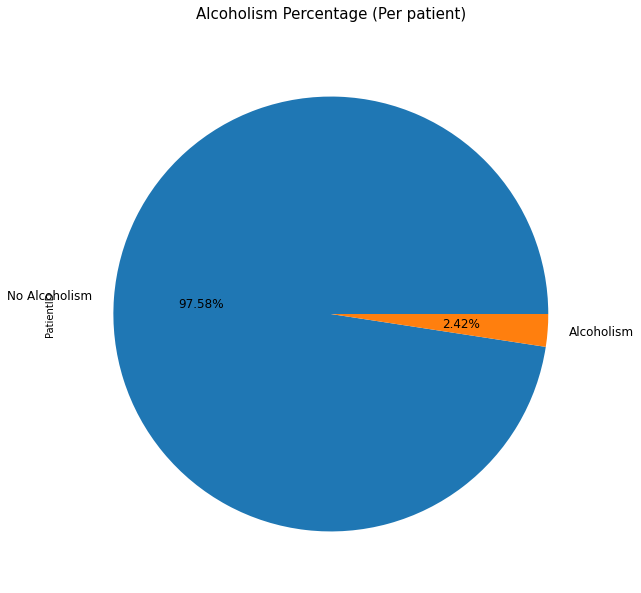

In [78]:
Number_Of_Patients(df, 'Alcoholism')

Looking at the chart above, we find that **97.58% of the patients don't have alcoholism**, which is close to the proportion we got when calculating the proportions (by appointments).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
Alcoholism,,
No Alcoholism,79.81,20.19
Alcoholism,79.85,20.15


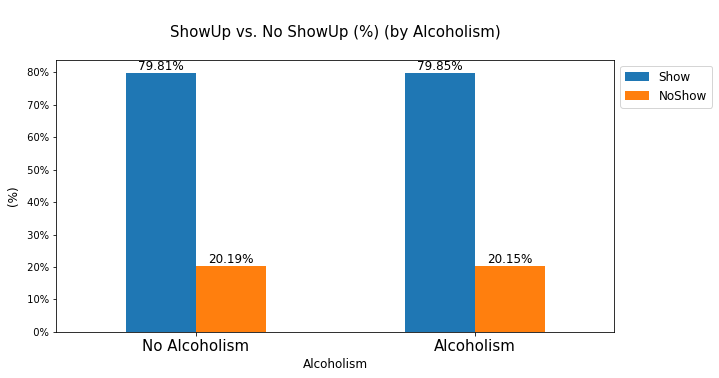

In [79]:
Status_bar_plot(df, 'Alcoholism')

Based on the **Alcoholism** analysis above, we found that:

    1- The proportion of appointments where patients don't have alcoholism is the largest with 96.96%
    2- The proportion of patients who don't have alcoholism is the largest with 97.58%.
    3- The Show-up rate of patients who have alcoholism is the highest with 79.85%
       where the show-up rate of patients who don't have alcoholism is 79.81%

 **Handicap Levels**

No Handicap    97.97
Handicap L1     1.85
Handicap L2     0.17
Handicap L3     0.01
Handicap L4     0.00
Name: Handicap, dtype: float64

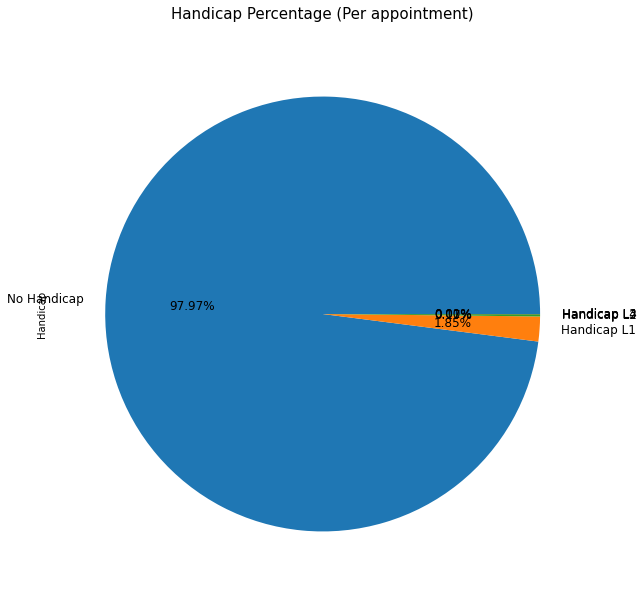

In [80]:
Proportion_By_Variable(df, 'Handicap')

Looking at the chart above, we find that the appointment proportion where patients **have no handicap condition is 97.97%**, where the proportion of appointments where patients **have Handicap L1 condition is 1.85%**.

,PatientID
Handicap,
No Handicap,98.18
Handicap L1,1.65
Handicap L2,0.16
Handicap L3,0.01
Handicap L4,0.00


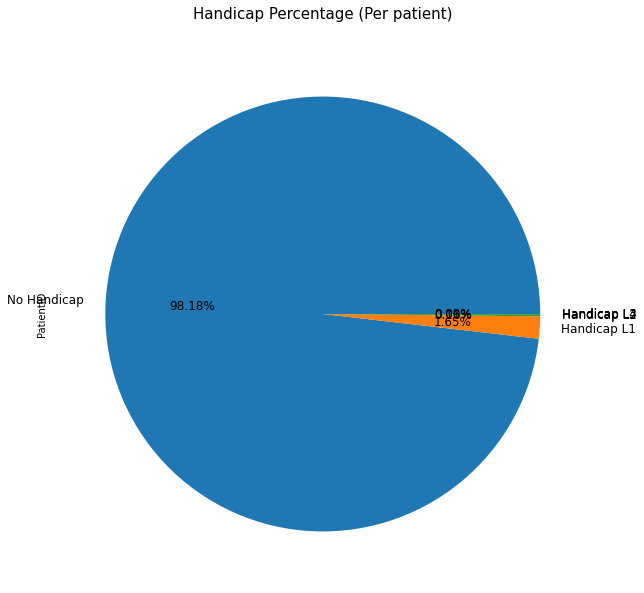

In [81]:
Number_Of_Patients(df, 'Handicap')

Looking at the chart above, we find that **98.18% of the patients don't have a handicap**, which is close to the proportion we got when calculating the proportions (by appointments).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
Handicap,,
No Handicap,79.77,20.23
Handicap L1,82.16,17.84
Handicap L2,79.78,20.22
Handicap L3,76.92,23.08
Handicap L4,66.67,33.33


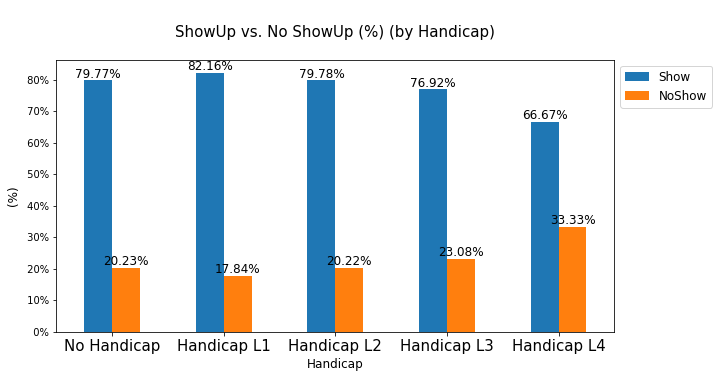

In [82]:
Status_bar_plot(df, 'Handicap')

Based on the **Handicap** analysis above, we found that:

    1- The proportion of appointments where patients don't have a handicap condition is the largest with 97.97%
    2- The proportion of patients who don't have a handicap condition is the largest with 98.18%.
    3- The Show-up rate of patients who have a handicap L1 condition is the highest with 82.16%
       where the show-up rate of patients who have a handicap L4 condition is 66.67%

**SMS_Received**

No SMS_received    67.9
SMS_received       32.1
Name: SMS_received, dtype: float64

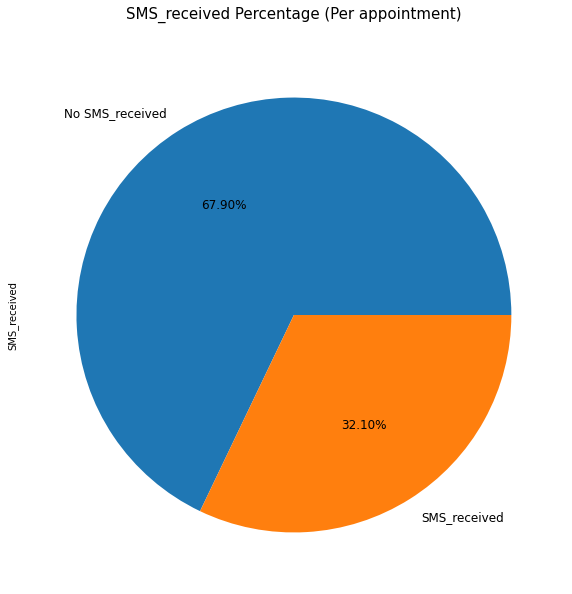

In [83]:
Proportion_By_Variable(df, 'SMS_received')

Looking at the chart above, we find that the appointment proportion where patients **didn't receive an SMS is 67.90%**, where the proportion of appointments where patients **received an SMS is 32.10%**.

,PatientID
SMS_received,
No SMS_received,63.59
SMS_received,36.41


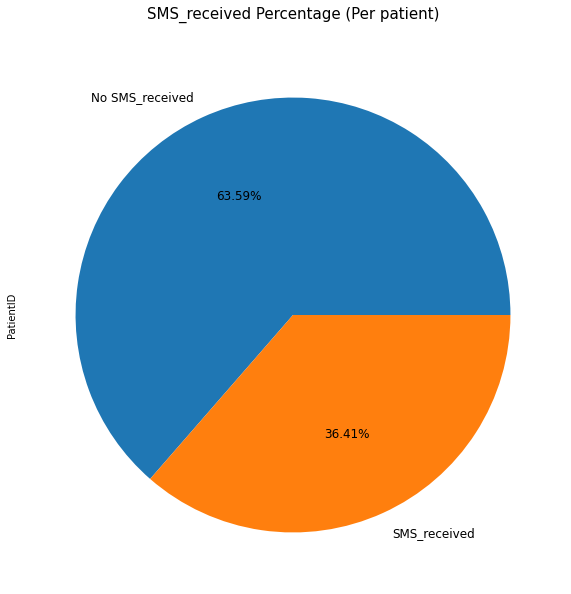

In [84]:
Number_Of_Patients(df, 'SMS_received')

Looking at the chart above, we find that **63.59%** of the patients **didn't receive an SMS reminder**, which is slightly different from the proportion **(67.90%)** we got when calculating the proportions (by appointments).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
SMS_received,,
No SMS_received,83.30,16.70
SMS_received,72.43,27.57


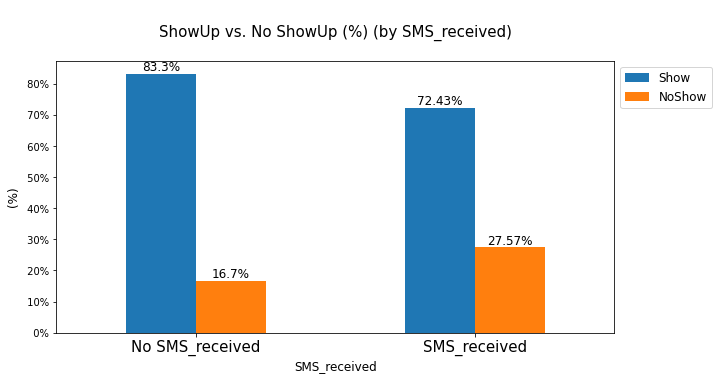

In [85]:
Status_bar_plot(df, 'SMS_received')

Based on the **SMS_received** analysis above, we found that:

    1- The proportion of appointments where patients didn't receive an SMS reminder is the largest with 67.90%
    2- The proportion of patients who didn't receive an SMS reminder is the largest with 67.59%.
    3- The Show-up rate of patients who didn't receive an SMS reminder is the highest with 83.3%
       where the show-up rate of patients who received an SMS reminder is 72.43%

**Day of Week**

2    23.40
1    23.20
0    20.55
4    17.21
3    15.60
5     0.04
Name: DayofWeek, dtype: float64

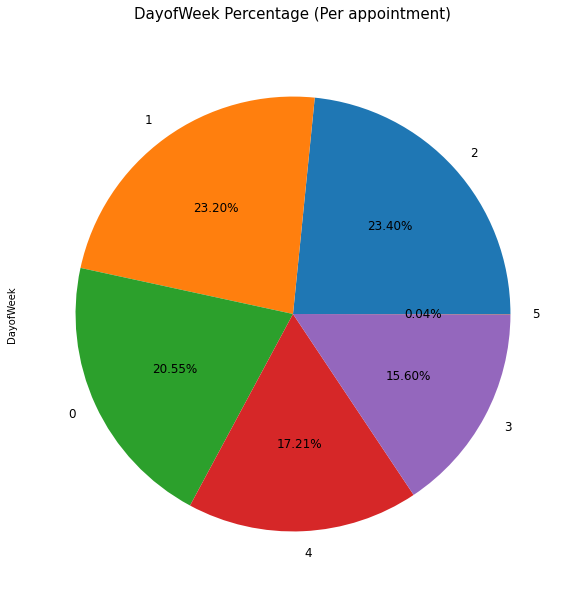

In [86]:
Proportion_By_Variable(df, 'DayofWeek')

Looking at the chart above, we find that the appointment proportion where patients where scheduled on a **Wednesday is 23.40%** which is the highest, where the **lowest** proportion of appointments is where patients shceduled on a **Saturday is 0.04%**.

,PatientID
DayofWeek,
0,20.52
1,22.99
2,22.88
3,16.29
4,17.28
5,0.04


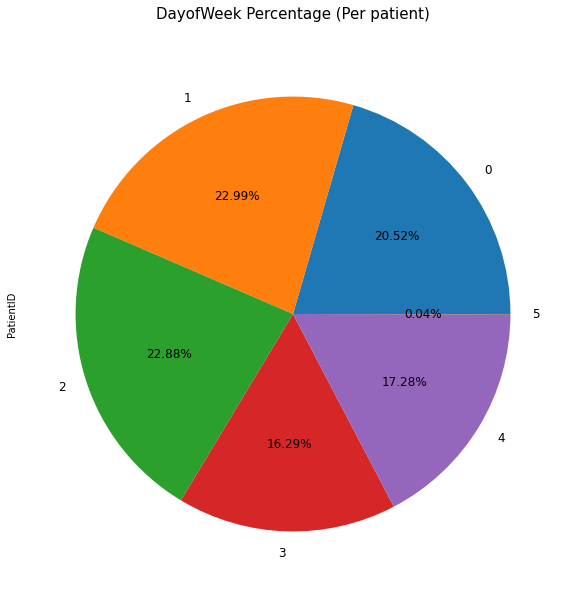

In [87]:
Number_Of_Patients(df, 'DayofWeek')

Looking at the chart above, we find that **22.99%** of the patients are scheduled to come on a **Tuesday**, which is slightly close to the proportion we got when calculating the proportions (by appointments).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
DayofWeek,,
0,79.36,20.64
1,79.91,20.09
2,80.31,19.69
3,80.65,19.35
4,78.77,21.23
5,76.92,23.08


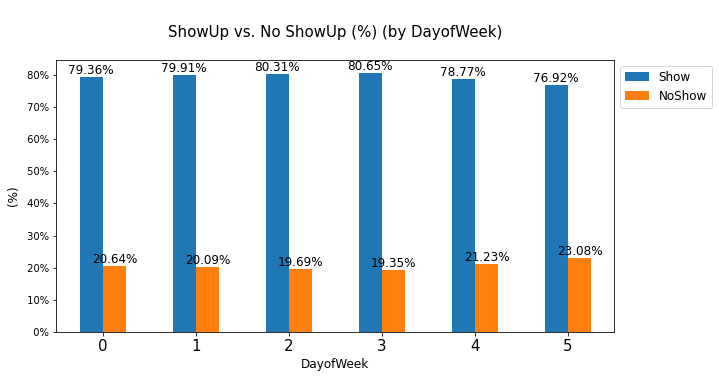

In [88]:
Status_bar_plot(df, 'DayofWeek')

Based on the **DayofWeek** analysis above, we found that:

    1- The proportion of appointments where patients were scheduled to come on a Wednesday is the largest with 23.40%
    2- The proportion of patients who were scheduled on a Tuesday is the largest with 22.99%.
    3- The Show-up rate of patients who were scheduled to come on a Thursday is the highest with 80.65%
       where the show-up rate of patients who were scheduled to come on a Saturday is the lowest with 76.92%

**Waiting Duration**

0 - 29       89.97
30 - 59       8.07
60 - 89       1.71
90 - 119      0.17
150 - 179     0.05
120 - 149     0.03
Name: WaitingDurationGroups, dtype: float64

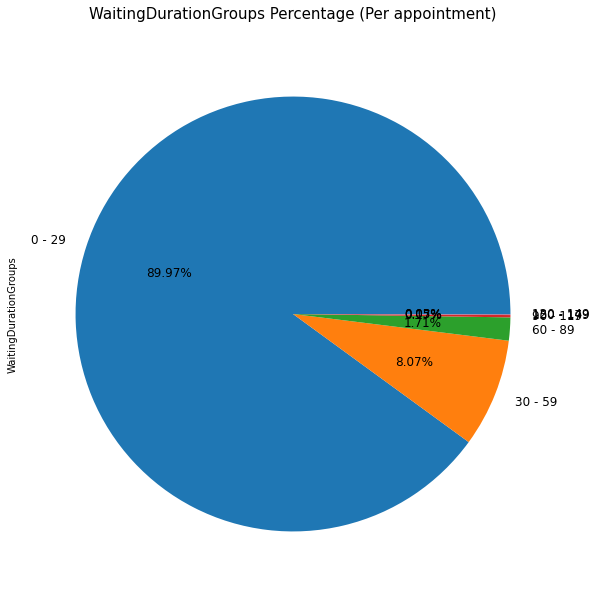

In [89]:
Proportion_By_Variable(df, 'WaitingDurationGroups')

Looking at the chart above, we find that the appointment proportion where patients have a waiting duration between **(0 - 29) days is 89.97%**, where the proportion of appointments where patients have have a waiting duration between **(120 - 149) days is 0.03%**.

,PatientID
WaitingDurationGroups,
0 - 29,85.10
30 - 59,11.89
60 - 89,2.61
90 - 119,0.28
120 - 149,0.04
150 - 179,0.08


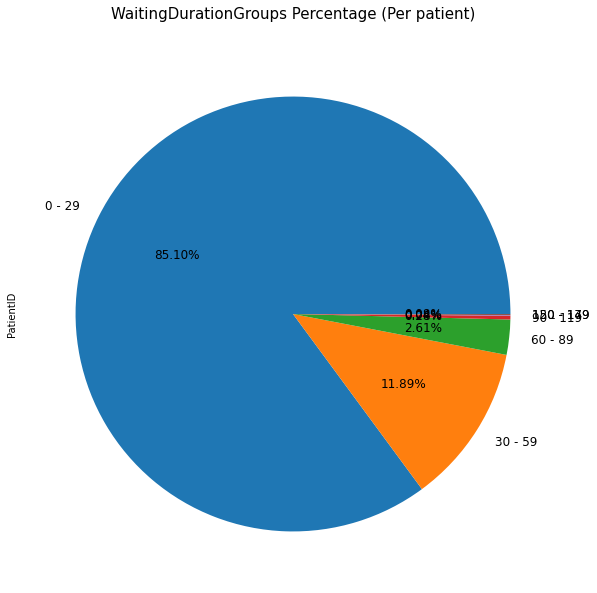

In [90]:
Number_Of_Patients(df, 'WaitingDurationGroups')

Looking at the chart above, we find that **85.10%** of the patients have a waiting duration between **(0 - 29) days**, which is slightly different from the proportion **(89.97%)** we got when calculating the proportions (by appointments).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Status,Show,NoShow
WaitingDurationGroups,,
0 - 29,81.19,18.81
30 - 59,66.51,33.49
60 - 89,70.58,29.42
90 - 119,78.42,21.58
120 - 149,62.07,37.93
150 - 179,67.86,32.14


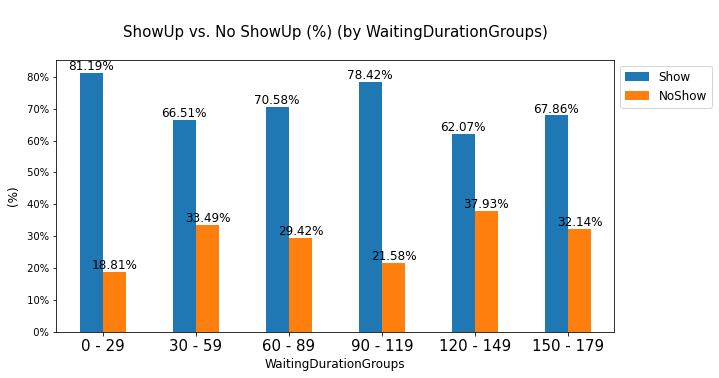

In [91]:
Status_bar_plot(df, 'WaitingDurationGroups')

Based on the **WaitingDuration** analysis above, we found that:

    1- The proportion of appointments where patients had a waiting duration between 0 - 29 days is the largest with 89.97%
    2- The proportion of patients who had a waiting duration between 0 - 29 days is the largest with 85.10%.
    3- The Show-up rate of patients who had a waiting duration between 0 - 29 days is the highest with 81.19%
       where the show-up rate of patients who have a waiting duration between 120 - 149 days is the lowest with 62.07%

<a id='conclusions'></a>
## Conclusions


**Limitations :**
     
     1- As we saw in some cases data was not consistent, we excluded 6 data entries from the original dataset.
        original size 110527,new size: 110521
        
     2- most of the columns are categorical data, so
        the visualization charts were mainly (stacked) bar charts & pie charts only but
        other quantitative-charts such as scatter plots excluded from this project.  
      
     3- The Neighbourhood column has a large unique values so i limit it to only the top 10 


**Findings:**

   **From overall Proportions :**
     
     1- The overall show-up rate is: 79.81% ~= 80%
        
     2- The percentage of female patients is greater than male patients (64.28% Female) vs (35.72% Male). 
     
     3- The largest Age group is (0 - 19) years old with 28.89% where the smallest is (100 - 119) years old with 0.01%.
     
     4- The neighbourhood with the largest percentage of appointments is JARDIM CAMURI with 19.02%
        of the total number of appointments (based on the top-10 neighbourhood list).
     
     5- the neighbourhood with the largest percentage of patients is JARDIM CAMBURI with 18.25%
        of the total number of patients (based on the top-10 neighbourhood list)
        
     6- The percentage of patients who (have a scholarship) is (9.29%) where,
        The percentage of patients who (don't have a scholarship) is (90.71%).
     
     7- The percentage of patients who (have a hypertension) is (19.65%) where,
        The percentage of patients who (don't have a hypertension) is (80.35%).
     
     8- The percentage of patients who (have a diabetes) is (7.09%) where,
        The percentage of patients who (don't have a diabetes) is (92.91%).
     
     9- The percentage of patients who (have a alcoholism) is (2.42%) where,
        The percentage of patients who (don't have a alcoholism) is (97.58%).
     
     10- The percentage of patients who (received SMS reminder) is (36.41%) where,
         The percentage of patients who (don't received SMS reminder) is (63.59%).
     
     11- the patients with No Handicap (98.18%) , 
                           handicap L1 (1.65%) ,
                           handicap L2 (0.16%) ,
                           handicap L3 (0.01%) ,
                           handicap L4 (0%)
                           
     12- The DayOfWeek with the largest number of appointments was (Wednesday) with (23.40%)where,
         the DayOfWeek with the smallest number of appointments was (Saturday) with 0.04%   
         
     13- The waiting duration with the largest number of appointments was between (0 - 29) days with (89.97%)where,
         The waiting duration with the smallest number of appointments was between (120 - 149) days with (0.03%)
         . 
     
     
  **From Show-up rates (per no. of appointments):**
        
     1- The Show-up rate of male patients is slightly greater than the show-up rate of female patients
        (80.04% males) vs (79.69% female). 
     
     2- The Show-up rate of age group (60 - 79) is the highest with (84.88%) where,
        the show-up rate of age group (100 - 119) is the lowest with (72.73%).
     
     3- The Show-up rate of (SANTA MARTHA) is the highest with (84.16%) where,
        the show-up rate of (ITARARÉ) is the lowest with (73.73%).
     
     4- The Show-up rate of patients who (don't have a scholarship) is the highest with (80.2%) where,
        the show-up rate of patients who (have a scholarship) is (76.26%)
        
     5- The Show-up rate of patients who (have hypertension) is the highest with (82.7%) where,
        the show-up rate of patients who (dont'have hypertension) is (79.1%).
     
     6- The Show-up rate of patients who (have diabetes) is the highest with (82%) where,
        the show-up rate of patients who (don't have diabetes) is (79.64%)
     
     7- The Show-up rate of patients who (have alcoholism) is the highest with (79.85%) where,
        the show-up rate of patients who (don't have alcoholism) is (79.81%).
     
     8- The Show-up rate of patients who (have a handicap L1) is the highest with (82.16%) where,
         the show-up rate of patients who (have a handicap L4) is the smallest with (66.67%)
     
     9- The Show-up rate of patients who (didn't receive SMS reminder) is the highest with (83.3%) where,
        the show-up rate of patients who (received SMS reminder) is (72.43%)
     
     10- The Show-up rate of patients who were scheduled to come on a (Thursday) is the highest with (80.65%) where,
         the show-up rate of patients who were scheduled to come on a (Saturday) is the lowest with (76.92%).
                           
     11-The Show-up rate of patients when the waiting duration between (0 - 29) days is the highest with (81.19%) where,
        the show-up rate of patients when the waiting duration between (120 - 149) days is the lowest with (62.07%).    
   



## Save it as HTML file 

In [92]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255